In [1]:
from warnings import simplefilter

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import patches

In [5]:
simplefilter('ignore',lineno=2366)
rcParams['figure.facecolor'] = 'white'

## Image test

In [6]:
pil_img = Image.open('slice_86.png')
img_tot = np.array(pil_img)
img = img_tot[100:360,40:470].astype('uint16') # 'zoom on patient'

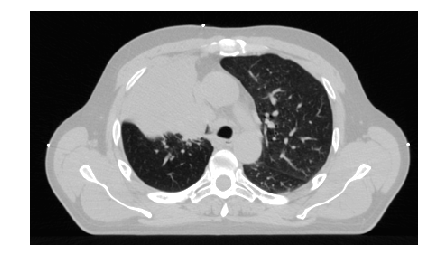

In [7]:
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
plt.axis('off')
plt.savefig('output/img_ref.png')
plt.show()

## Espacement vs taille des pixels

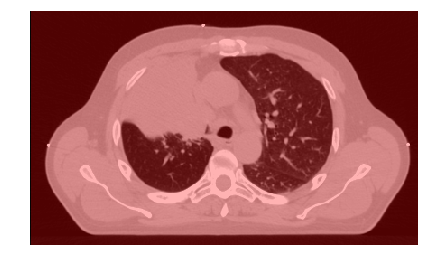

In [8]:
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
# plt.title('Dimension = espace')
plt.axis('off')
axis = plt.gca()
nb_pix = 30
inc_x = img.shape[0]/nb_pix
inc_y = img.shape[1]/nb_pix

for i in range(nb_pix):
    for j in range(nb_pix):
        axis.add_patch(patches.Rectangle((inc_y*i,inc_x*j),inc_y,inc_x,\
                                         alpha=0.3,facecolor='red'))
plt.savefig('output/img_equal.png')
plt.show()

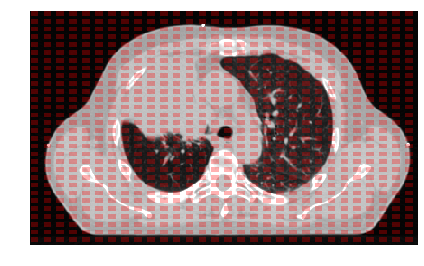

In [9]:
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
plt.axis('off')
axis = plt.gca()
nb_pix = 30
inc_x = img.shape[0]/nb_pix
inc_y = img.shape[1]/nb_pix

for i in range(nb_pix):
    for j in range(nb_pix):
        axis.add_patch(patches.Rectangle((inc_y*i,inc_x*j),inc_y*0.6,inc_x*0.6,\
                                         alpha=0.3,facecolor='red'))
plt.savefig('output/img_sm.png')
plt.show()

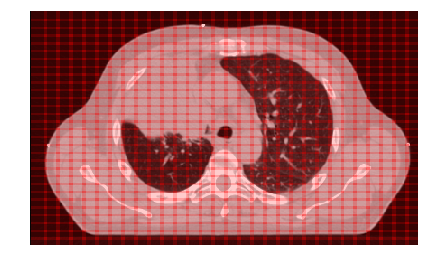

In [10]:
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
plt.axis('off')
axis = plt.gca()
nb_pix = 30
inc_x = img.shape[0]/nb_pix
inc_y = img.shape[1]/nb_pix

for i in range(nb_pix):
    for j in range(nb_pix):
        axis.add_patch(patches.Rectangle((inc_y*i,inc_x*j),inc_y*1.3,inc_x*1.3,\
                                         alpha=0.2,facecolor='red'))

axis.add_patch(patches.Rectangle((inc_y*10,inc_x*10),inc_y*1.3,inc_x*1.3,\
                                         alpha=1,facecolor='None',linewidth=2))      
plt.savefig('output/img_lrg.png')
plt.show()

## Résolution spatiale et taille des pixels

Résolution de l'image de base: 0.9765 mm/pixel

In [11]:
from skimage.transform import downscale_local_mean

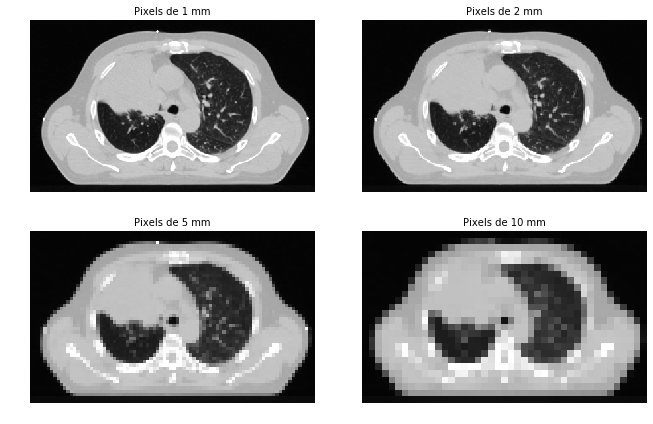

In [12]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(2,2,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
ax.set_title('Pixels de 1 mm')
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(downscale_local_mean(img,(2,2)),cmap='gray',vmin=0,vmax=1400)
ax.set_title('Pixels de 2 mm')
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(downscale_local_mean(img,(5,5)),cmap='gray',vmin=0,vmax=1400)
ax.set_title('Pixels de 5 mm')
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(downscale_local_mean(img,(10,10)),cmap='gray',vmin=0,vmax=1400)
ax.set_title('Pixels de 10 mm')
plt.axis('off')

plt.savefig('output/pixel_resolution.png')
plt.show()

### Échantillonage et repliement (aliasing)

In [13]:
from skimage.filters import gaussian

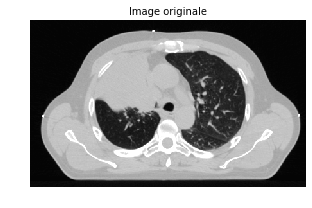

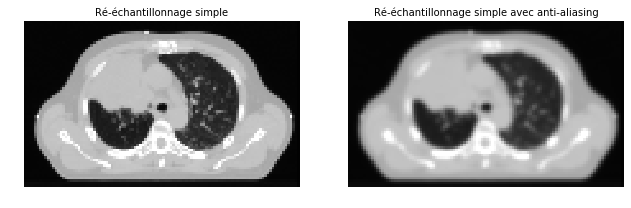

In [14]:
fig = plt.figure(figsize=(5,3))
ax = plt.subplot(1,1,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
ax.set_title('Image originale')
plt.axis('off')
plt.savefig('output/orig.png')
plt.show()

fig = plt.figure(figsize=(10,3))
ax = plt.subplot(1,2,1)
im2 = gaussian(downscale_local_mean(img,(10,10)))
plt.imshow(downscale_local_mean(img,(4,4)),cmap='gray',vmin=0,vmax=1400)
ax.set_title('Ré-échantillonnage simple')
plt.axis('off')

ax = plt.subplot(1,2,2)
im2 = gaussian(img,sigma=3,preserve_range=True) # act as anti-aliasing
plt.imshow(downscale_local_mean(im2,(4,4)),cmap='gray',vmin=0,vmax=1400)
ax.set_title('Ré-échantillonnage simple avec anti-aliasing')
plt.axis('off')
plt.savefig('output/aliasing.png')
plt.show()

## Plage dynamique

In [15]:
from skimage.exposure import rescale_intensity

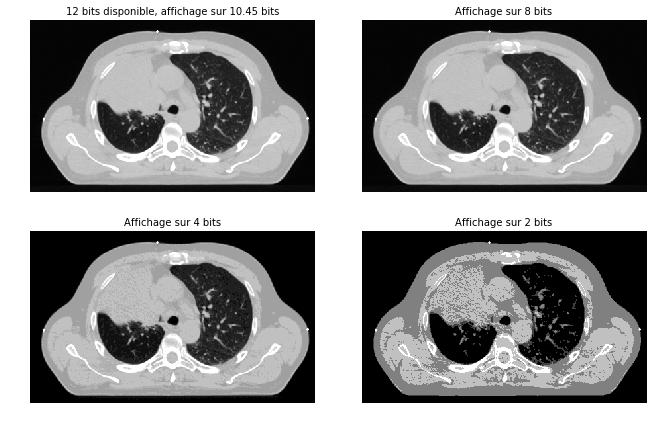

In [16]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
ax.set_title('12 bits disponible, affichage sur {:.2f} bits'.format(np.log2(1400)))
plt.axis('off')

ax = plt.subplot(2,2,2)
im = rescale_intensity(img,in_range=(0,1400),out_range=(0,255))
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
ax.set_title('Affichage sur 8 bits')
plt.axis('off')

ax = plt.subplot(2,2,3)
im = rescale_intensity(img,in_range=(0,1400),out_range=(0,16))
plt.imshow(im,cmap='gray',vmin=0,vmax=16)
ax.set_title('Affichage sur 4 bits')
# ax.set_title('Affichage sur 4 bits'.format(np.log2(mx)))
plt.axis('off')

ax = plt.subplot(2,2,4)
im = rescale_intensity(img,in_range=(0,1400),out_range=(0,4))
plt.imshow(im,cmap='gray',vmin=0,vmax=4)
ax.set_title('Affichage sur 2 bits')
# ax.set_title('Affichage sur 2 bits'.format(np.log2(mx)))
plt.axis('off')

plt.savefig('output/dynrange.png')

plt.show()

## Fenêtrage (Window/level)

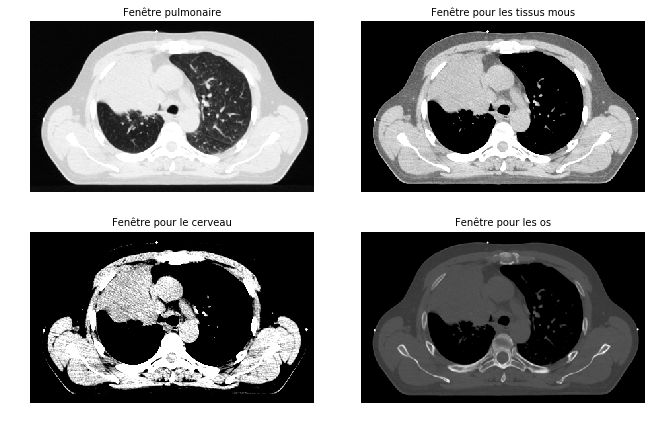

In [17]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=1150)
ax.set_title('Fenêtre pulmonaire')
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(img,cmap='gray',vmin=750,vmax=1150)
ax.set_title('Fenêtre pour les tissus mous')
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(img,cmap='gray',vmin=980,vmax=1080)
ax.set_title('Fenêtre pour le cerveau')
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(img,cmap='gray',vmin=500,vmax=2300)
ax.set_title('Fenêtre pour les os')
plt.axis('off')

plt.savefig('output/win_lvl.png')

plt.show()

## Contraste global

In [18]:
im_window = img[100:200,100:200].copy()
mx = im_window.max()
mn = im_window.min()

def measCtrst(im):
    return (im.max() - im.min())/(im.max()+im.min())

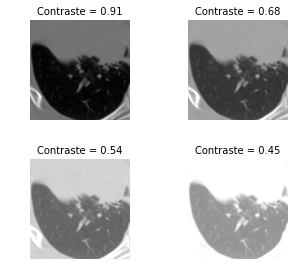

In [19]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(2,2,1)
plt.imshow(im_window,cmap='gray',vmin=mn,vmax=mx)
ax.set_title('Contraste = {:.2f}'.format(measCtrst(im_window)))
plt.axis('off')

ax = plt.subplot(2,2,2)
im_window += 400
plt.imshow(im_window,cmap='gray',vmin=mn,vmax=mx)
ax.set_title('Contraste = {:.2f}'.format(measCtrst(im_window)))
plt.axis('off')

ax = plt.subplot(2,2,3)
im_window += 400
plt.imshow(im_window,cmap='gray',vmin=mn,vmax=mx)
ax.set_title('Contraste = {:.2f}'.format(measCtrst(im_window)))
plt.axis('off')

ax = plt.subplot(2,2,4)
im_window += 400
plt.imshow(im_window,cmap='gray',vmin=mn,vmax=mx)
ax.set_title('Contraste = {:.2f}'.format(measCtrst(im_window)))
plt.axis('off')

plt.savefig('output/contrast_global.png')
plt.show()

## Bruit et SNR

In [20]:
poisson_noise = np.vectorize(lambda x: np.random.normal(0,np.sqrt(x)))

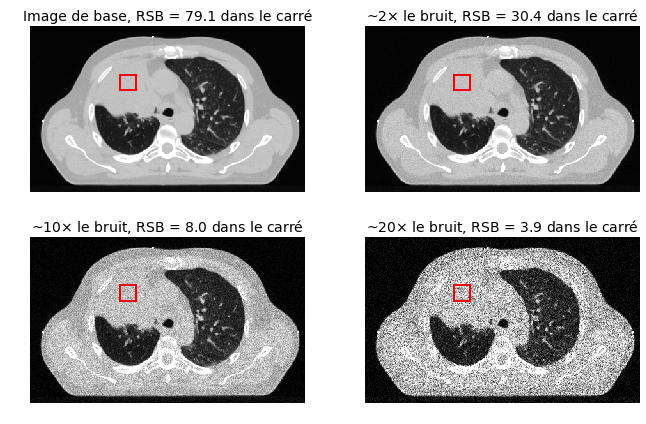

In [21]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
smpl = img[75:100,140:165]
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
ax.set_title('Image de base, RSB = {:.1f} dans le carré'.format(smpl.mean()/smpl.std()),fontsize=14)
ax.add_patch(patches.Rectangle((140,75),25,25,alpha=1,edgecolor='red',facecolor='None',linewidth=2))  
plt.axis('off')

ax = plt.subplot(2,2,2)
noisy = img + 1*poisson_noise(img)
smpl = noisy[75:100,140:165]
plt.imshow(noisy,cmap='gray',vmin=0,vmax=1400)
ax.set_title(r'~2$\times$ le bruit, RSB = {:.1f} dans le carré'.format(smpl.mean()/smpl.std()),fontsize=14)
ax.add_patch(patches.Rectangle((140,75),25,25,alpha=1,edgecolor='red',facecolor='None',linewidth=2))  
plt.axis('off')


ax = plt.subplot(2,2,3)
noisy = img + 4*poisson_noise(img)
smpl = noisy[75:100,140:165]
plt.imshow(noisy,cmap='gray',vmin=0,vmax=1400)
ax.set_title(r'~10$\times$ le bruit, RSB = {:.1f} dans le carré'.format(smpl.mean()/smpl.std()),fontsize=14)
ax.add_patch(patches.Rectangle((140,75),25,25,alpha=1,edgecolor='red',facecolor='None',linewidth=2))  
plt.axis('off')


ax = plt.subplot(2,2,4)
noisy = img + 9*poisson_noise(img)
smpl = noisy[75:100,140:165]
plt.imshow(noisy,cmap='gray',vmin=0,vmax=1400)
ax.set_title(r'~20$\times$ le bruit, RSB = {:.1f} dans le carré'.format(smpl.mean()/smpl.std()),fontsize=14)
ax.add_patch(patches.Rectangle((140,75),25,25,alpha=1,edgecolor='red',facecolor='None',linewidth=2))  
plt.axis('off')

plt.savefig('output/SNR.png')
plt.show()

## Transformations affines

In [22]:
from skimage.transform import AffineTransform, warp

Créons un canvas un peu plus grand pour éviter de tronquer l'image

In [23]:
canvas = np.ones((500,700))*4000
canvas[(500-img.shape[0]):,:img.shape[1]] = img

### Rotation

In [24]:
R = AffineTransform(rotation=0.11*np.pi) # rotation de 20 degrés
print('Matrice de rotation')
print(R.params[:2,:2])

Matrice de rotation
[[ 0.94088077 -0.33873792]
 [ 0.33873792  0.94088077]]


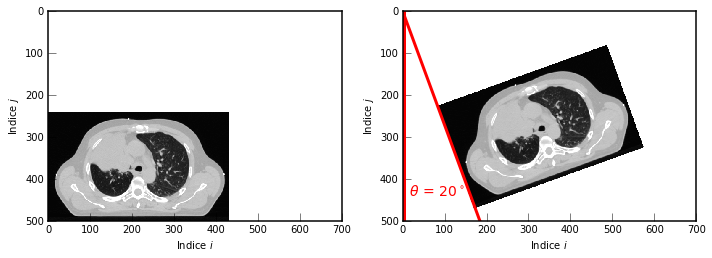

In [25]:
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
plt.imshow(canvas,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
plt.xlim([0,700])
plt.ylim([500,0])

im_rot = warp(canvas,R,preserve_range=True,mode='constant',cval=4000)
ax = plt.subplot(1,2,2)
plt.imshow(im_rot,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
plt.xlim([0,700])
plt.ylim([500,0])
plt.plot([0,500*np.sin(0.12*np.pi)],[0,500],color='red',linewidth=3)
plt.plot([2,2],[2,500],color='red',linewidth=3)
ax.text(15,440,r'$\theta$ = 20$^\circ$',color='red',size=14)

plt.savefig('output/simplerot.png',transparent=True)
plt.show()

## Translation

In [26]:
T = AffineTransform(translation=(-250,125))
print(T.params)

[[   1.   -0. -250.]
 [   0.    1.  125.]
 [   0.    0.    1.]]


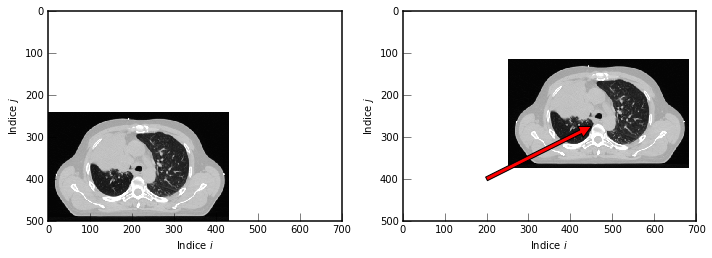

In [27]:
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
plt.imshow(canvas,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
plt.xlim([0,700])
plt.ylim([500,0])
# ax.annotate('',xy=(200+250,400-125),xytext=(200,400),arrowprops={'facecolor':'red'})


im_trans = warp(canvas,T,preserve_range=True,mode='constant',cval=4000)
ax = plt.subplot(1,2,2)
plt.imshow(im_trans,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
plt.xlim([0,700])
plt.ylim([500,0])
ax.annotate('',xy=(200+250,400-125),xytext=(200,400),arrowprops={'facecolor':'red'})

plt.savefig('output/trans.png')
plt.show()

In [28]:
trans = (-200,220)
shear = 10 *2*np.pi/360
rot = -20 *2*np.pi/360

T = AffineTransform(translation=trans)
print(T.params)

S = AffineTransform(shear=shear)
print(S.params)

R = AffineTransform(rotation=rot)
print(R.params)

print(T.params @ S.params @ R.params)

[[   1.   -0. -200.]
 [   0.    1.  220.]
 [   0.    0.    1.]]
[[ 1.         -0.17364818  0.        ]
 [ 0.          0.98480775  0.        ]
 [ 0.          0.          1.        ]]
[[ 0.93969262  0.34202014  0.        ]
 [-0.34202014  0.93969262  0.        ]
 [ 0.          0.          1.        ]]
[[ 9.99083795e-01  1.78844232e-01 -2.00000000e+02]
 [-3.36824089e-01  9.25416578e-01  2.20000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


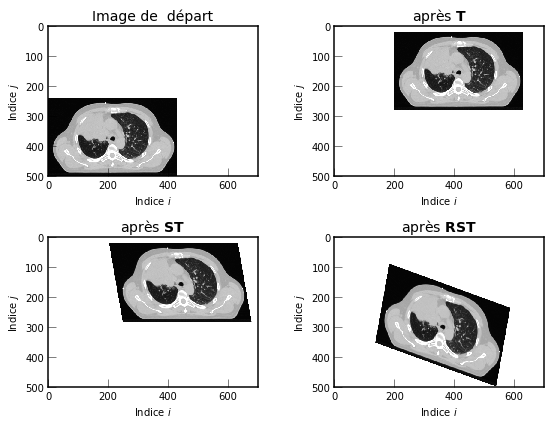

In [29]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(canvas,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
ax.set_title(r'Image de  départ',fontsize=14)
plt.xlim([0,700])
plt.ylim([500,0])

im_mod = warp(canvas,T,preserve_range=True,mode='constant',cval=4000)
ax = plt.subplot(2,2,2)
plt.imshow(im_mod,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
ax.set_title(r'après $\bf T$',fontsize=14)
plt.xlim([0,700])
plt.ylim([500,0])

im_mod = warp(im_mod,S,preserve_range=True,mode='constant',cval=4000)
ax = plt.subplot(2,2,3)
plt.imshow(im_mod,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
ax.set_title(r'après $\bf{ST}$',fontsize=14)
plt.xlim([0,700])
plt.ylim([500,0])

im_mod = warp(im_mod,R,preserve_range=True,mode='constant',cval=4000)
ax = plt.subplot(2,2,4)
plt.imshow(im_mod,cmap='gray',vmin=0,vmax=1400)
plt.xlabel(r'Indice $i$')
plt.ylabel(r'Indice $j$')
ax.set_title(r'après $\bf{RST}$',fontsize=14)
plt.xlim([0,700])
plt.ylim([500,0])

plt.savefig('output/multi_aff.png')
plt.show()

## Transformation locale (affine par partie)

In [30]:
from skimage.transform import PiecewiseAffineTransform, warp

In [31]:
canvas = np.ones((410,470))*4000 # 75, 20 padding
canvas[(410-75-img.shape[0]):(410-75),20:(20+img.shape[1])] = img

In [32]:
pt_row = np.linspace(0,img.shape[0],10) + 75
pt_col = np.linspace(0,img.shape[1],20) + 20
# pt_row, pt_col = np.meshgrid(pt_row, pt_col)
pt_col, pt_row = np.meshgrid(pt_row, pt_col)
pts = np.dstack([pt_row.flat, pt_col.flat])[0]

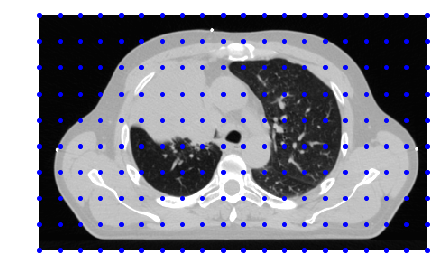

In [33]:
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1,1,1)
plt.imshow(canvas,cmap='gray',vmin=0,vmax=1400)
plt.xlim([10,img.shape[1]+30])
plt.ylim([img.shape[0]+85,65])
plt.axis('off')
plt.plot(pts[:,0],pts[:,1],'.b')

# plt.savefig('output/nodes.png',transparent=True)
plt.show()

In [34]:
def invertBelow(y,t=205):
    if y<t:
        return -1
    else:
        return 1
invertBelow = np.vectorize(invertBelow)
pts_def = pts.copy()
pts_def[:,1] = pts[:,1] + 50*np.sin(pts[:,0]/pts[:,0].max()*np.pi*invertBelow(pts[:,1]))

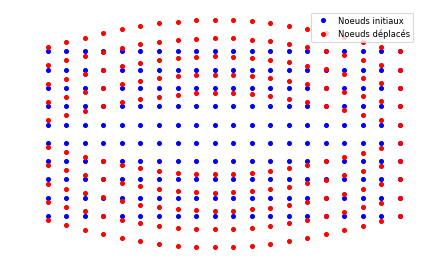

In [35]:
plt.plot(pts[:,0],pts[:,1],'.b',label='Noeuds initiaux')
plt.plot(pts_def[:,0],pts_def[:,1],'.r',label='Noeuds déplacés')
plt.axis('off')
plt.legend(numpoints=1)
plt.savefig('output/nodes_def.png',transparent=True)
plt.show()

In [36]:
T = PiecewiseAffineTransform()
_ = T.estimate(pts,pts_def)

In [37]:
im_mod = warp(canvas,T.inverse,preserve_range=True,mode='constant',cval=4000)

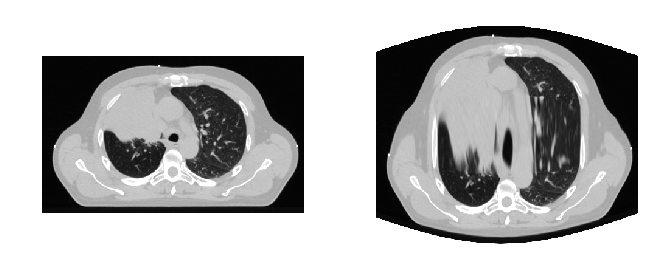

In [38]:
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
plt.imshow(canvas,cmap='gray',vmin=0,vmax=1400)
plt.axis('off')

ax = plt.subplot(1,2,2)
plt.imshow(im_mod,cmap='gray',vmin=0,vmax=1400)
plt.axis('off')
# plt.plot(pts[:,0],pts[:,1],'.b')

plt.savefig('output/img_def.png',transparent=True)
plt.show()

## Filtrage

### Lookup table

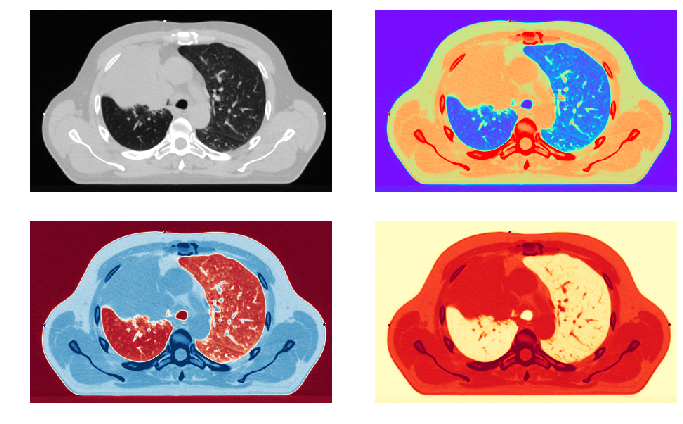

In [39]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(img,cmap='rainbow',vmin=0,vmax=1400)
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(img,cmap='RdBu',vmin=0,vmax=1400)
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(img,cmap='YlOrRd',vmin=0,vmax=1400)
plt.axis('off')

plt.savefig('output/lut.png',transparent=True)
plt.show()

### Histogramme

In [40]:
from skimage.exposure import equalize_hist, equalize_adapthist
img_ctr = img[40:260,90:310] # pour éviter les marqueurs radio-opaque

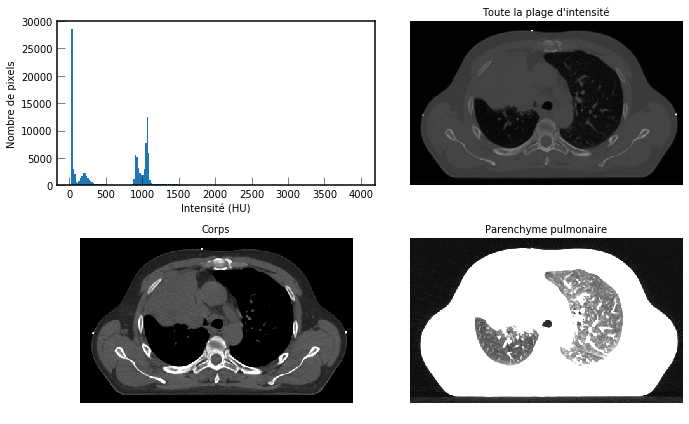

In [41]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
_ = plt.hist(img.ravel(),bins=200,density=False)
plt.xlabel('Intensité (HU)')
plt.ylabel('Nombre de pixels')

ax = plt.subplot(2,2,2)
plt.imshow(img,cmap='gray',vmin=0,vmax=4000)
ax.set_title('Toute la plage d\'intensité')
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(img,cmap='gray',vmin=800,vmax=1600)
ax.set_title('Corps')
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(img,cmap='gray',vmin=0,vmax=400)
ax.set_title('Parenchyme pulmonaire')
plt.axis('off')


plt.savefig('output/lin_cont.png',transparent=True)
plt.show()


In [42]:
# im_eq = equalize_hist(img_ctr)
im_eq = equalize_adapthist(img_ctr)

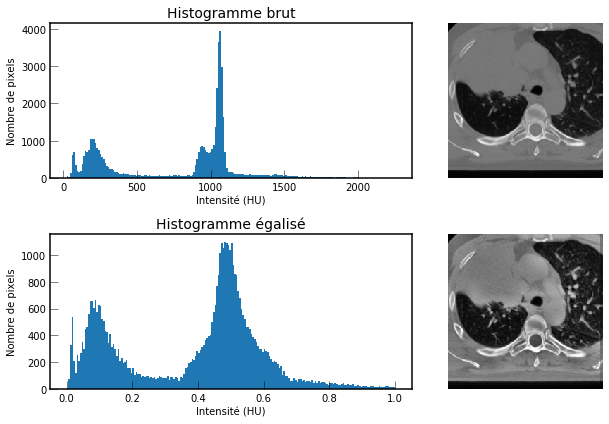

In [44]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
_ = plt.hist(img_ctr.ravel(),bins=200,density=False)
plt.xlabel('Intensité (HU)')
plt.ylabel('Nombre de pixels')
ax.set_title('Histogramme brut',fontsize=14)

ax = plt.subplot(2,2,2)
plt.imshow(img_ctr,cmap='gray')
plt.axis('off')

ax = plt.subplot(2,2,3)
_ = plt.hist(im_eq.ravel(),bins=200,density=False)
plt.xlabel('Intensité (HU)')
plt.ylabel('Nombre de pixels')
ax.set_title('Histogramme égalisé',fontsize=14)

ax = plt.subplot(2,2,4)
plt.imshow(im_eq,cmap='gray')
plt.axis('off')

plt.savefig('output/histo_eq.png',transparent=True)
plt.show()

### Information mutuelle

In [45]:
def mutual_information(h):
    """ Calcul de l'information mutuelle sur un histogramme conjoint """
    # conversion des bins en probabilite
    pxy = h / float(np.sum(h))
    px = np.sum(pxy, axis=1) # marginale pour x
    py = np.sum(pxy, axis=0) # marginale pour y
    px_py = px[:, None] * py[None, :] # Broadcast pour multiplier les marginales
    # Calculs
    nzs = pxy > 0 # seul les non-nuls contribuent
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

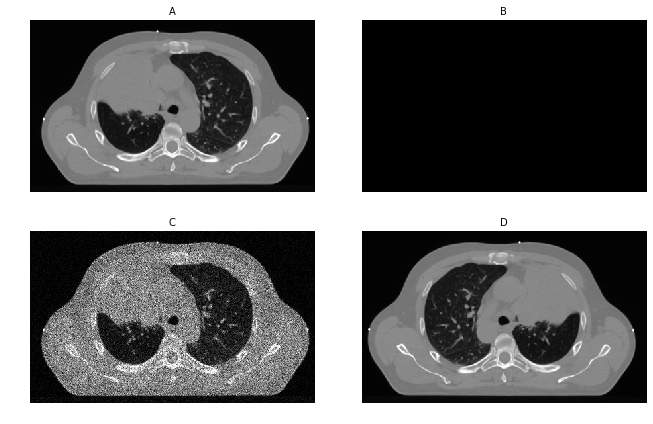

-2.0086993090527983e-16
0.8470766055430405
0.6834270109921383
2.157415422748418


In [46]:
hist_a, edges = np.histogram(img.ravel(),bins=100)
img_flip = img[:,::-1]
img_empty = np.zeros(img.shape)
img_noisy = img + 9*poisson_noise(img)

fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=2000)
ax.set_title('A')
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(img_empty,cmap='gray',vmin=0,vmax=2000)
ax.set_title('B')
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(img_noisy,cmap='gray',vmin=0,vmax=2000)
ax.set_title('C')
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(img_flip,cmap='gray',vmin=0,vmax=2000)
ax.set_title('D')
plt.axis('off')

plt.savefig('output/info_mutuelle.png',transparent=True)
plt.show()

for im in [img_empty,img_noisy, img_flip, img]:
    hist_2d, x_edges, y_edges = np.histogram2d(img.ravel(), im.ravel(),bins=50)
    print(mutual_information(hist_2d))

### Moyenne

In [47]:
from skimage.filters.rank import mean as mean_filter
from skimage.exposure import rescale_intensity

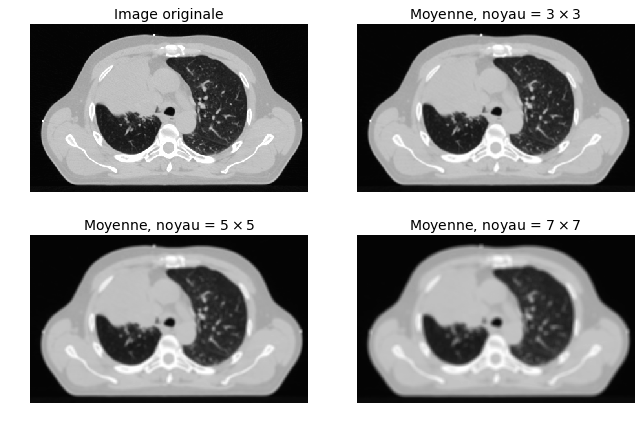

In [48]:
# rescale to 8 bits to avoid warnings
im_mean = rescale_intensity(img,in_range=(0,1400),out_range='uint8') 

k3 = np.ones( (3,3) )
k5 = np.ones( (5,5) )
k7 = np.ones( (7,7) )

fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(im_mean,cmap='gray',vmin=0,vmax=255)
ax.set_title('Image originale', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(mean_filter(im_mean,k3),cmap='gray',vmin=0,vmax=255)
ax.set_title(r'Moyenne, noyau = $3 \times 3$', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(mean_filter(im_mean,k5),cmap='gray',vmin=0,vmax=255)
ax.set_title(r'Moyenne, noyau = $5 \times 5$', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(mean_filter(im_mean,k7),cmap='gray',vmin=0,vmax=255)
ax.set_title(r'Moyenne, noyau = $7 \times 7$', fontsize=14)
plt.axis('off')

plt.savefig('output/mean_filter.png',transparent=True)
plt.show()

### Sobel

In [49]:
from skimage.filters import sobel, sobel_h, sobel_v
# rescale to 8 bits to avoid warnings
im = rescale_intensity(img,in_range=(0,1400),out_range='uint8') 

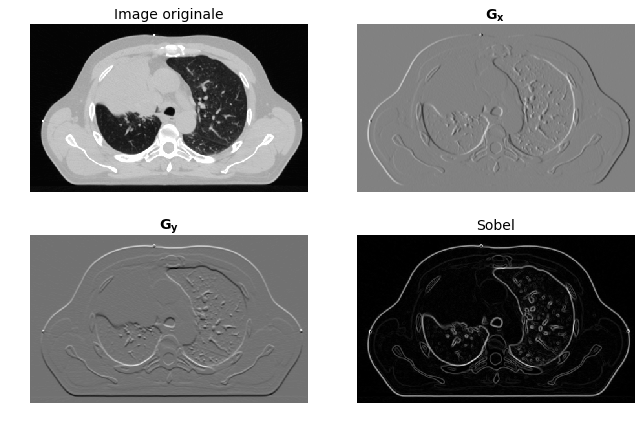

In [50]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(im_mean,cmap='gray',vmin=0,vmax=255)
ax.set_title('Image originale', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(sobel_v(im),cmap='gray')
ax.set_title(r'$\bf{G}_x$', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(sobel_h(im),cmap='gray')
ax.set_title(r'$\bf{G}_y$', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(sobel(im),cmap='gray')
ax.set_title('Sobel', fontsize=14)
plt.axis('off')

plt.savefig('output/sobel.png',transparent=True)
plt.show()

### Erosion

*Note:* doit travailler sur une image binaire pour bien illustrer

In [51]:
from skimage.morphology import disk, binary_erosion

In [52]:
imbin = np.zeros((200,200))
imbin[50:150,50:150] = 1
imbin[130:150,130:150] = 0
imbin[60:70,70:100] = 0
imbin[157:170,:] = 1
imbin[170:,0:30] = 1
imbin[170:,170:] = 1 

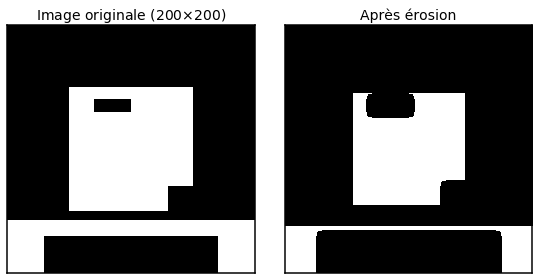

In [53]:
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
ax.set_title(r'Image originale (200$\times$200)', fontsize=14)
plt.imshow(imbin,cmap='gray')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])


ax = plt.subplot(1,2,2)
plt.imshow(binary_erosion(imbin,disk(5)),cmap='gray')
ax.set_title('Après érosion', fontsize=14)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.savefig('output/erosion.png',transparent=True)
plt.show()